#Importing Darts Library
Like scikit-learn, darts also comes with a few standard datasets that do not require downloading any file from some external website.

In [1]:
#pip install darts

In [2]:
#pip install matplotlib

In [3]:
#pip install numpy

# Importing Library and dataset
After installing the library we will import darts along with the Air passengers time series dataset from darts.dataset

In [4]:
#imporint main class timeseries from darts
from darts import TimeSeries
#importing air passenger dataset from darts
from darts.datasets import AirPassengersDataset

TimeSeries is the main data class in Darts. A TimeSeries represents a univariate or multivariate time series, with a proper time index.

#Plotting the dataset
Let’s load our time-series dataset and plot it

In [5]:
#loading the imported dataset
series = AirPassengersDataset().load()

In [6]:
#series

In [7]:
#series.head()

In [8]:
#series.tail()

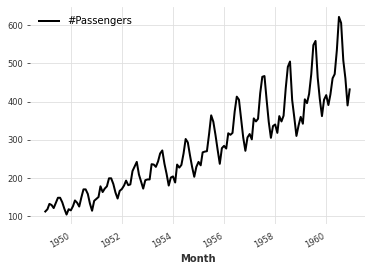

In [9]:
#plotting the dataset
series.plot()

The x-axis represents years and the y-axis represents the number of passengers.

TimeSeries class contains different kinds of operations, let’s look few of them.

#Splitting
You can split the dataset using either of these two commands

*   split_after(split_point), which Splits the series in two, after a provided split_point.
*   split_before(split_point), that Splits the series in two, before a provided split_point.

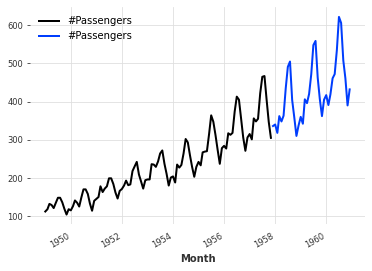

In [10]:
#splitting before
series1, series2 = series.split_before(0.75)
series1.plot()
series2.plot()

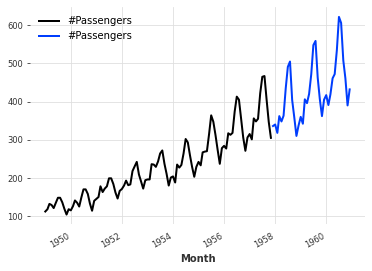

In [11]:
#splitting after
series1, series2 = series.split_before(0.75)
series1.plot()
series2.plot()

Breaking the series into two portions i.e., 75% and 25% with two different methods as stated above.

#Slicing
You can slice time series data using the indexing method.

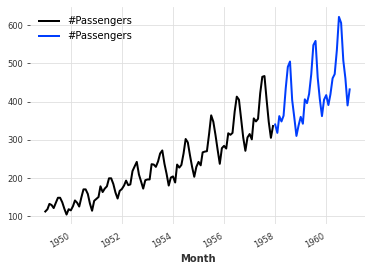

In [12]:
series1, series2 = series[:-36], series[-36:]
series1.plot()
series2.plot()

#Arithmetic operation
Performing an arithmetic operation on our series dataset

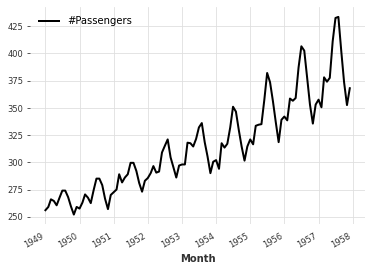

In [13]:
#arithmatic operation on series
(series1/2+(20*10)).plot()

#Mapping operations
mapping on values using the NumPy library

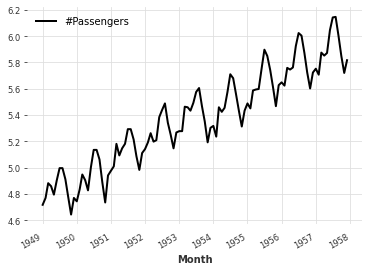

In [14]:
#import numpy library
import numpy as np
#mapping operation on series
series1.map(np.log).plot()

#Adding some binary holidays component
This is where things going to be interesting!

As stated on their official documentation the add_holidays method adds a binary univariate component to the current series that equals 1 at every index that corresponds to the selected country’s holiday, and 0 otherwise.

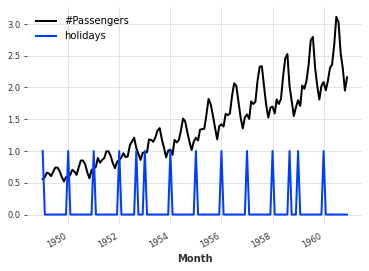

In [15]:
#adding holiday based on country code
(series/200).add_holidays("US").plot()

/usr/local/lib/python3.7/dist-packages/holidays/countries/india.py:174: Warning: Diwali and Holi holidays available from 2010 to 2030 only
  warnings.warn(warning_msg, Warning)


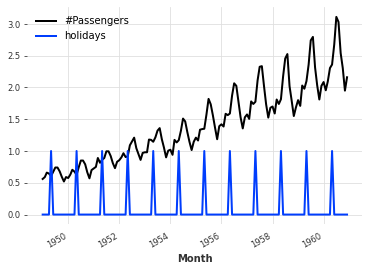

In [16]:
#adding holiday based on country code
(series/200).add_holidays("IN").plot()

#Filling missing values
Darts contains a filling_missing_values function that gives you the ability to fill missing values in your time series data

Here is the code demonstrating this feature:

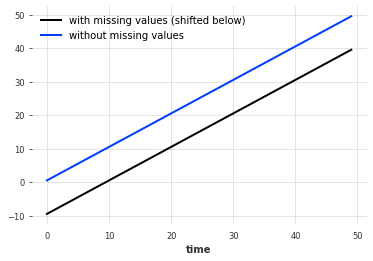

In [20]:
#importing numpy
import numpy as np

#import filling_missing_values feature from darts
from darts.utils.missing_values import fill_missing_values

#Creating timeseries value
values = np.arange(0.5, 50)

#filling those NAN values using TimeSeries feature
series_ = TimeSeries.from_values(values)

#plotting the differences
(series_ - 10).plot(label="with missing values (shifted below)")
fill_missing_values(series_).plot(label="without missing values")

#Creating a train and test data for prediction
We are using our Air Passenger dataset and splitting it into train and test data

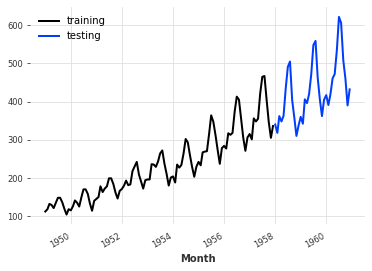

In [21]:
#import pandas
import pandas as pd

#creating train and test data and plotting it
train, test = series.split_before(pd.Timestamp("19580101"))
train.plot(label="training")
test.plot(label="testing")

#Forecasting using NaiveSeasonal
After splitting the dataset, we will be using our first forecasting model provided by the darts library.

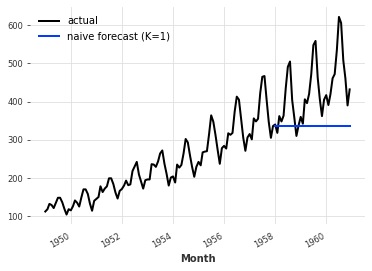

In [22]:
#importing NaiveSeasonal Model
from darts.models import NaiveSeasonal

#A very basic model which repeat its last
#value as a future value

naive_model = NaiveSeasonal(K=1)
naive_model.fit(train)
naive_forecast = naive_model.predict(36)

#plotting the prediction 
series.plot(label="actual")
naive_forecast.plot(label="naive forecast (K=1)")

#Inspect Seasonality
As you can see our model is too naïve (lack of prediction), and we have already seen that our data show seasonality behavior every year which we can confirm by using check_seasonality from darts.utils.statistics.

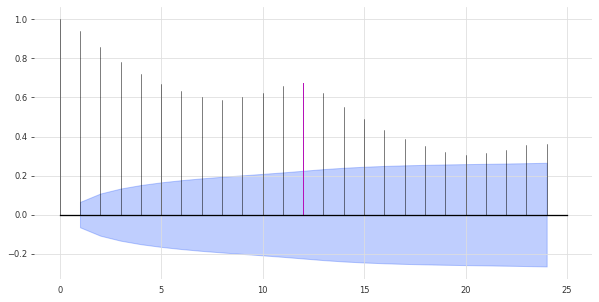

In [23]:
#importing the seasonability checking function and plotting it
from darts.utils.statistics import plot_acf, check_seasonality
plot_acf(train, m=12, alpha=0.5)

Now we will re-run our Naïve Seasonal model but with k = 12 (the value that we have identified earlier)

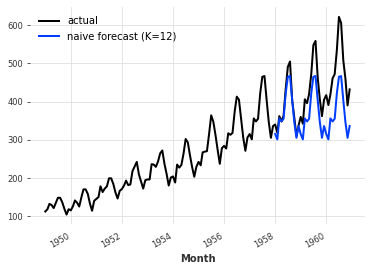

In [25]:
seasonal_model = NaiveSeasonal(K=12)
seasonal_model.fit(train)
seasonal_forecast = seasonal_model.predict(36)

series.plot(label="actual")
seasonal_forecast.plot(label="naive forecast (K=12)")

#Computing error metrics
Let’s take a look at the error value that we have to minimize. We can do that using the map function from darts.metrics

In [26]:
from darts.metrics import mape

print(
    "Mean absolute percentage error for the seasonal: {:.2f}%".format(
        mape(series, seasonal_forecast)
    )
)

Mean absolute percentage error for the seasonal: 13.19%
